In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd  # Import the pandas library

df = pd.read_csv("/content/tested.csv")  # Use pd.read_csv to read the CSV file

In [4]:
df.shape

(418, 12)

**Data Cleaning**

In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

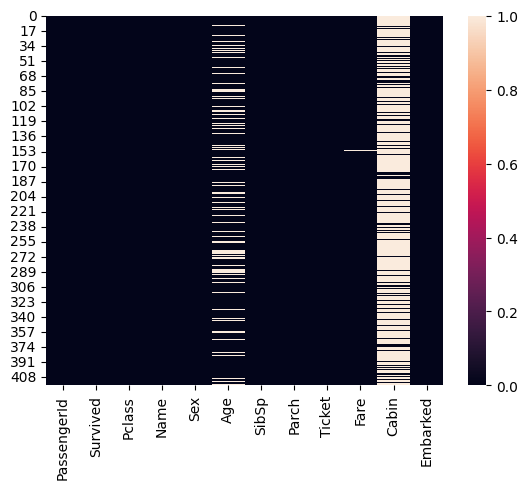

In [5]:
sns.heatmap(df.isnull());

In [6]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [7]:
df['Age'].describe()

count    332.000000
mean      30.272590
std       14.181209
min        0.170000
25%       21.000000
50%       27.000000
75%       39.000000
max       76.000000
Name: Age, dtype: float64

In [8]:
df['Age'].value_counts()

Age
21.0    17
24.0    17
22.0    16
30.0    15
18.0    13
        ..
76.0     1
28.5     1
22.5     1
62.0     1
38.5     1
Name: count, Length: 79, dtype: int64

In [9]:
# Filling null Value with mean

df['Age'] = df['Age'].fillna(df['Age'].mean())

<Axes: >

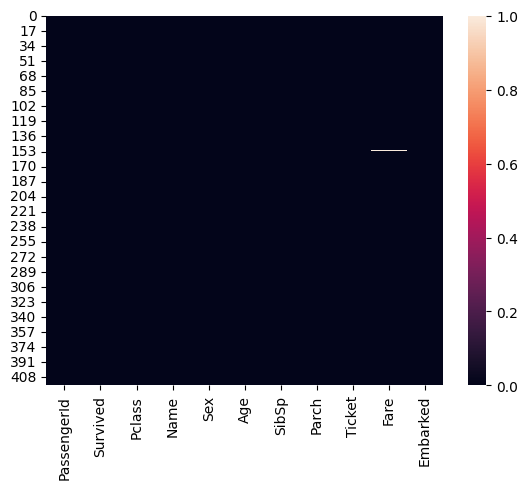

In [10]:
sns.heatmap(df.isnull())

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Identifying duplicate values

In [13]:
df.duplicated().sum()

0

In [14]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    object 
 4   Sex          417 non-null    object 
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 39.1+ KB


encoding


In [15]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
encoder= LabelEncoder()
df["Name"]=encoder.fit_transform(df["Name"])
df["Sex"]=encoder.fit_transform(df["Sex"])
df["Ticket"]=encoder.fit_transform(df["Ticket"])
df["Embarked"]=encoder.fit_transform(df["Embarked"])


In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,206,1,34.5,0,0,152,7.8292,1
1,893,1,3,402,0,47.0,1,0,221,7.0000,2
2,894,0,2,269,1,62.0,0,0,73,9.6875,1
3,895,0,3,407,1,27.0,0,0,147,8.6625,2
4,896,1,3,178,0,22.0,1,1,138,12.2875,2


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Survived     417 non-null    int64  
 2   Pclass       417 non-null    int64  
 3   Name         417 non-null    int64  
 4   Sex          417 non-null    int64  
 5   Age          417 non-null    float64
 6   SibSp        417 non-null    int64  
 7   Parch        417 non-null    int64  
 8   Ticket       417 non-null    int64  
 9   Fare         417 non-null    float64
 10  Embarked     417 non-null    int64  
dtypes: float64(2), int64(9)
memory usage: 39.1 KB


## Check for outliers

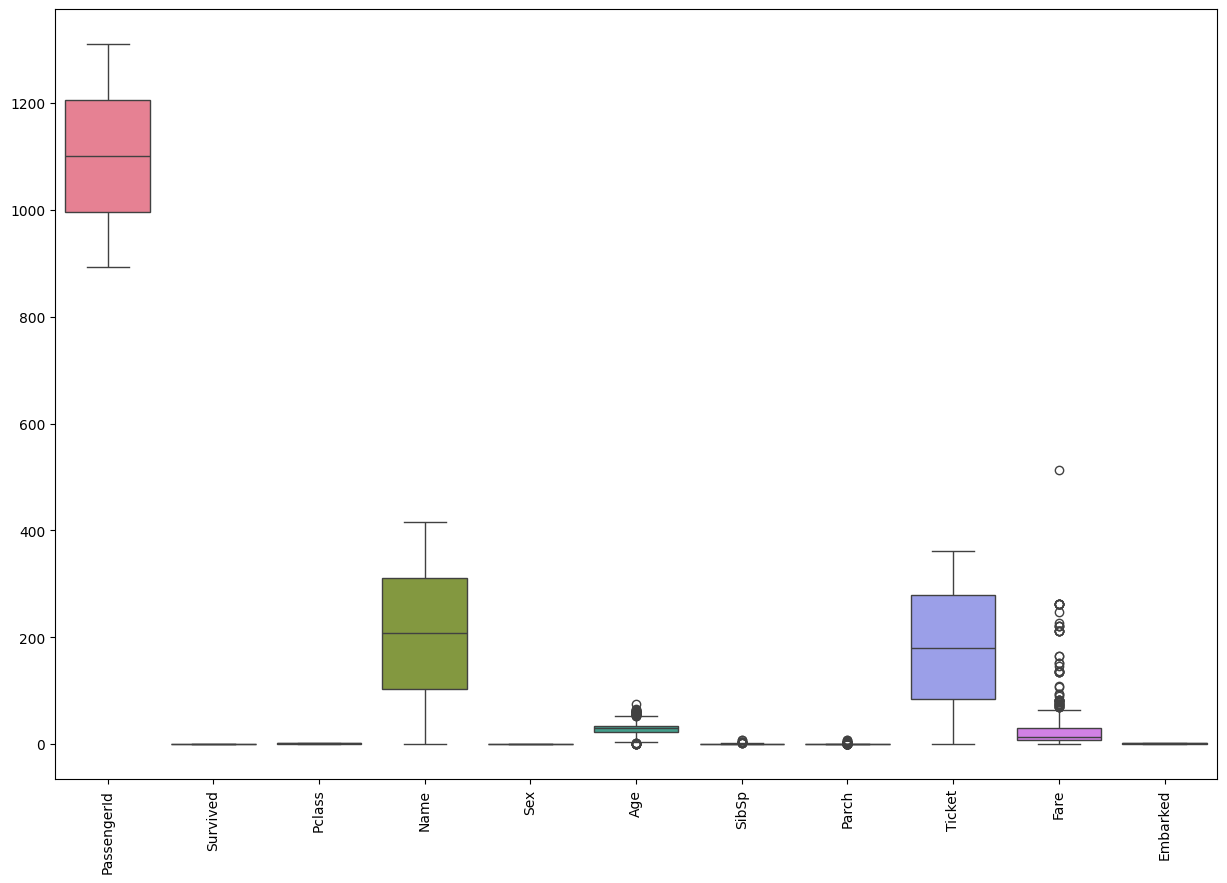

In [18]:
# Create box plots for all columns
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

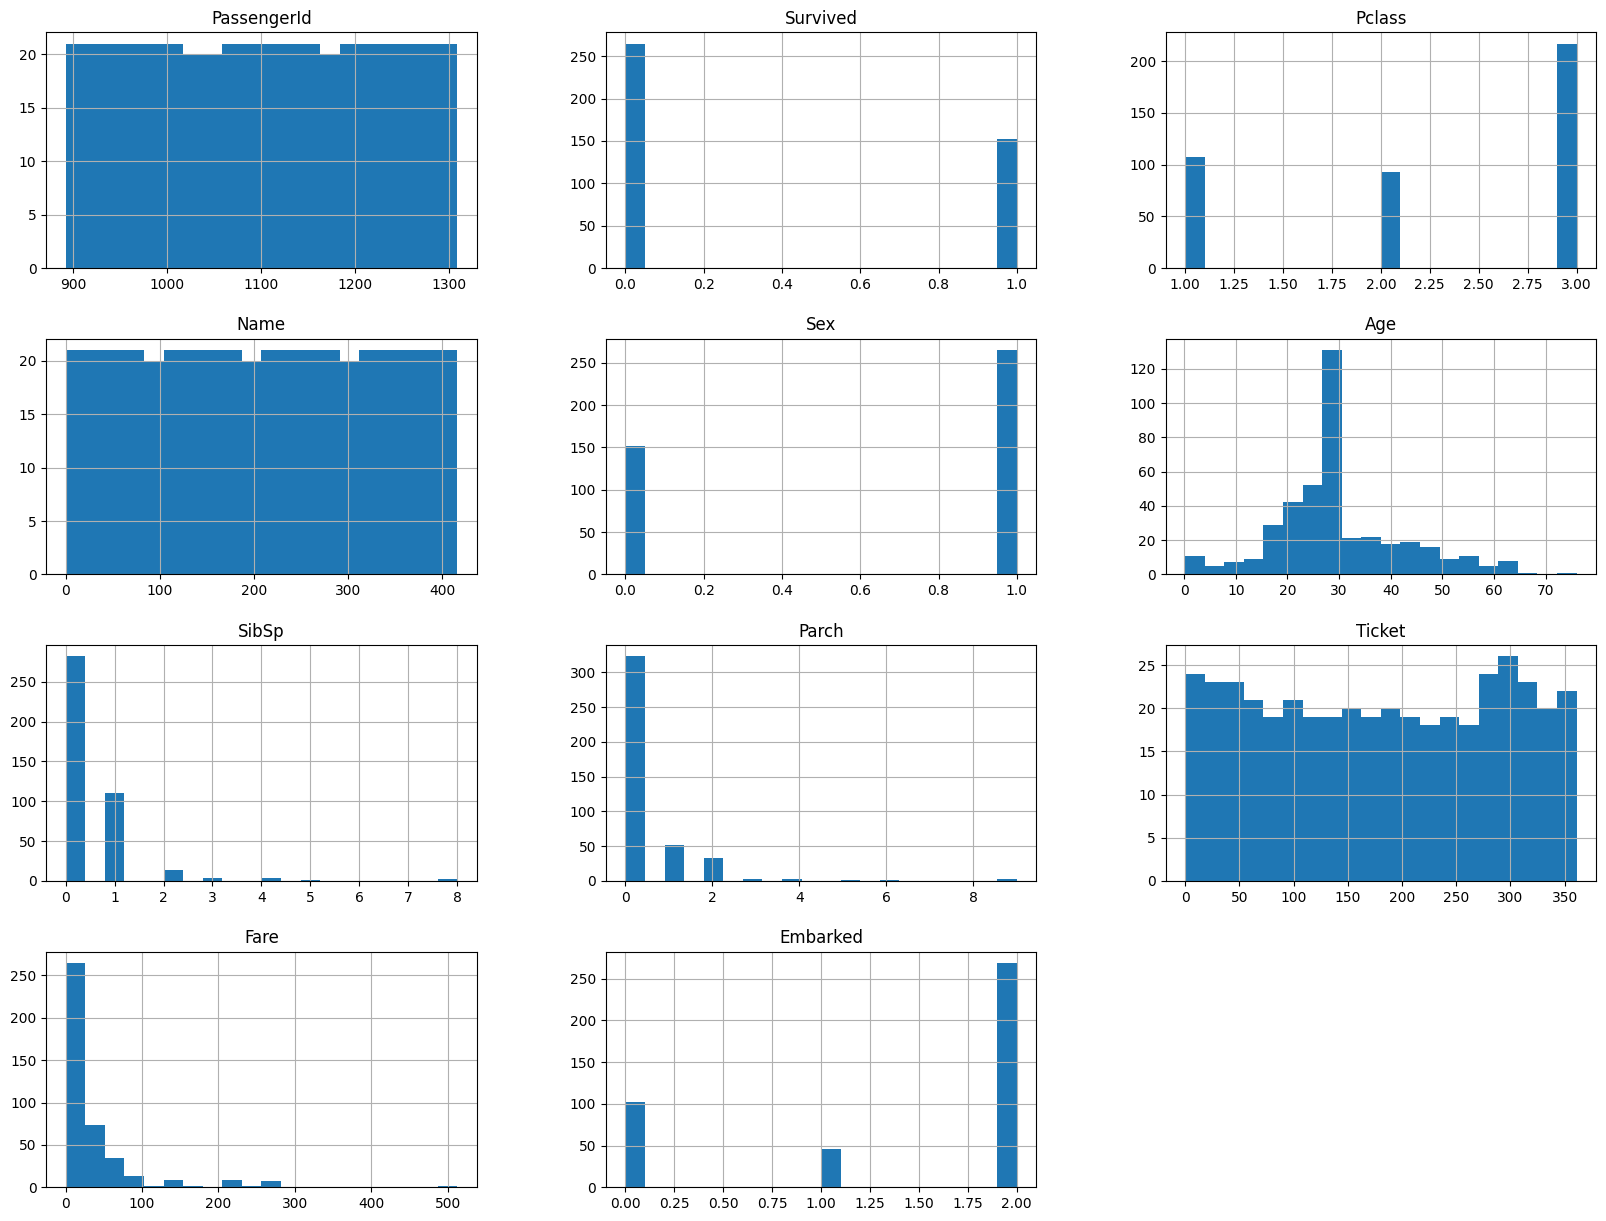

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
df.hist(bins=20 , figsize = (20 , 15))
plt.show()

In [20]:
df['Age'].value_counts()

Age
30.27259    86
24.00000    17
21.00000    17
22.00000    16
30.00000    15
            ..
67.00000     1
28.50000     1
22.50000     1
62.00000     1
38.50000     1
Name: count, Length: 79, dtype: int64

In [21]:
df['Fare'].value_counts()

Fare
7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: count, Length: 169, dtype: int64

In [22]:
df['Survived'].value_counts()

Survived
0    265
1    152
Name: count, dtype: int64

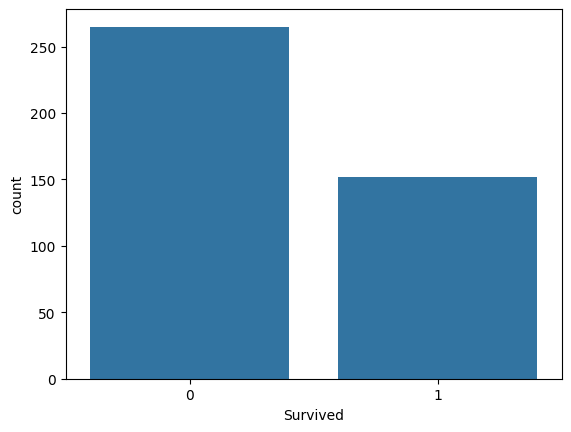

In [23]:
sns.countplot(x='Survived',data=df);


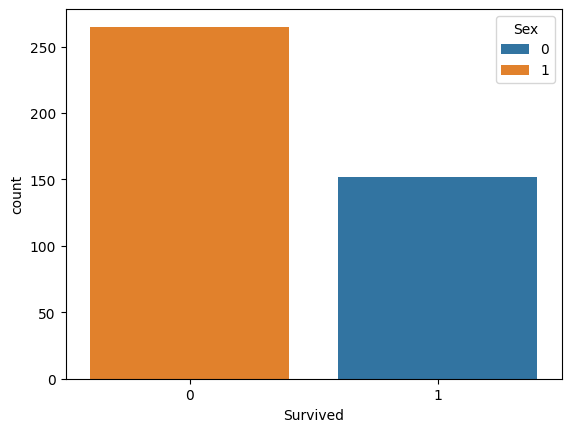

In [24]:
sns.countplot(x ='Survived' , hue = 'Sex' , data = df)
plt.show()

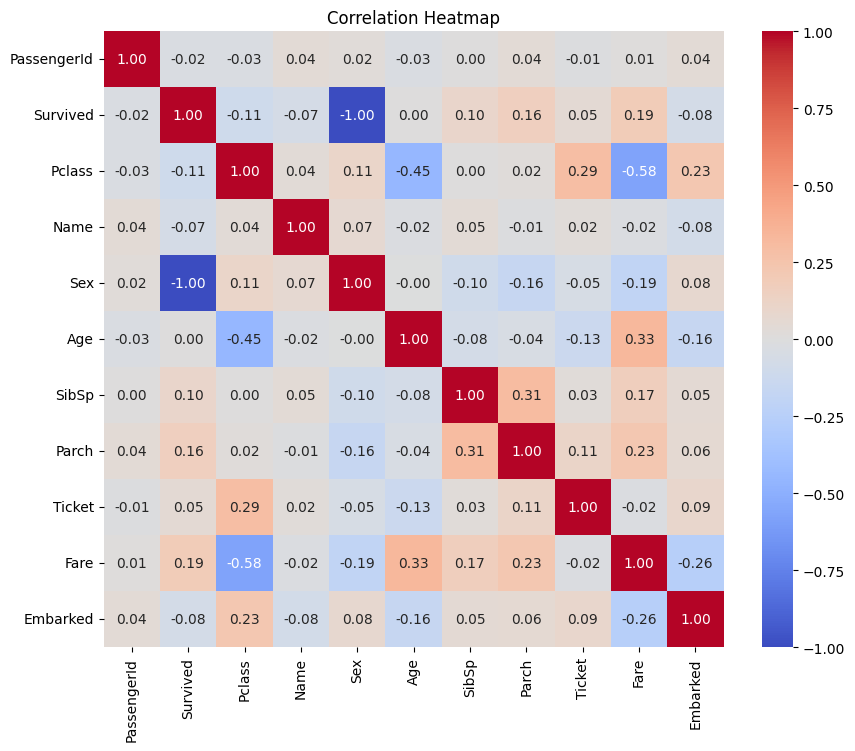

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## Data Preprocessing

### Changing column order

In [26]:
# Reorder columns, moving 'Survived' to the front
new_order = ['Survived'] + [col for col in df.columns if col != 'Survived']
df = df[new_order]


##Dropping unnecessary columns

### columns like 'Name' and 'Ticket' might not be useful for predicting survival and could potentially be dropped.

In [27]:
df = df.drop(['Name', 'Ticket'], axis=1)

In [28]:
df

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,892,3,1,34.50000,0,0,7.8292,1
1,1,893,3,0,47.00000,1,0,7.0000,2
2,0,894,2,1,62.00000,0,0,9.6875,1
3,0,895,3,1,27.00000,0,0,8.6625,2
4,1,896,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,0,1305,3,1,30.27259,0,0,8.0500,2
414,1,1306,1,0,39.00000,0,0,108.9000,0
415,0,1307,3,1,38.50000,0,0,7.2500,2
416,0,1308,3,1,30.27259,0,0,8.0500,2


### imbalance

In [29]:
df['Survived'].value_counts()

Survived
0    265
1    152
Name: count, dtype: int64

In [30]:
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Survived', axis=1)
y = df['Survived']

# Initialize SMOTE
smote = SMOTE()


X_resampled, y_resampled = smote.fit_resample(X, y)


df_balanced = pd.DataFrame(X_resampled, columns=X.columns)
df_balanced['Survived'] = y_resampled

In [31]:
df_balanced

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,1,34.500000,0,0,7.829200,1,0
1,893,3,0,47.000000,1,0,7.000000,2,1
2,894,2,1,62.000000,0,0,9.687500,1,0
3,895,3,1,27.000000,0,0,8.662500,2,0
4,896,3,0,22.000000,1,1,12.287500,2,1
...,...,...,...,...,...,...,...,...,...
525,1069,2,0,31.293265,0,2,38.338115,2,1
526,1173,3,0,17.056563,0,0,11.457317,1,1
527,967,1,0,51.847491,1,0,25.100795,2,1
528,1260,2,0,24.116521,0,0,39.666517,2,1


### normalization

### This will standardize the 'Age' and 'Fare' columns to have a mean of 0 and a standard deviation of 1

In [32]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns to normalize
numerical_cols = ['Age', 'Fare']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [33]:
# Calculate mean and standard deviation of normalized columns
print(df[numerical_cols].mean())
print(df[numerical_cols].std())

Age     2.449413e-17
Fare   -1.916932e-17
dtype: float64
Age     1.001201
Fare    1.001201
dtype: float64


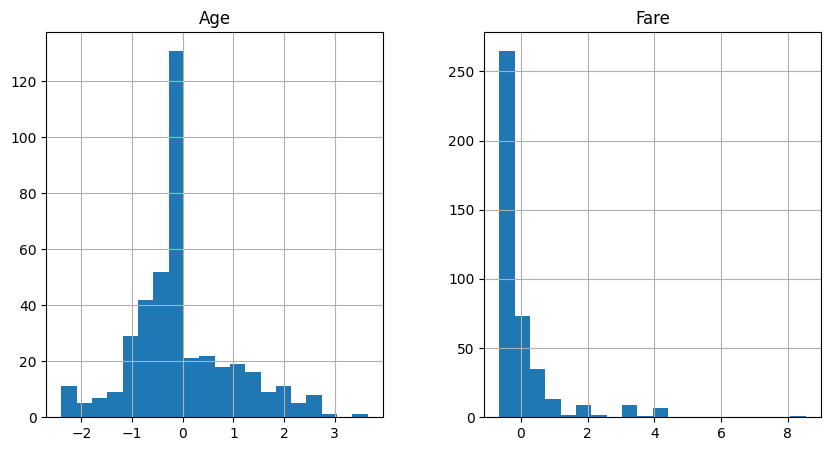

In [34]:

# Plot histograms for normalized features
df[numerical_cols].hist(bins=20, figsize=(10, 5))
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

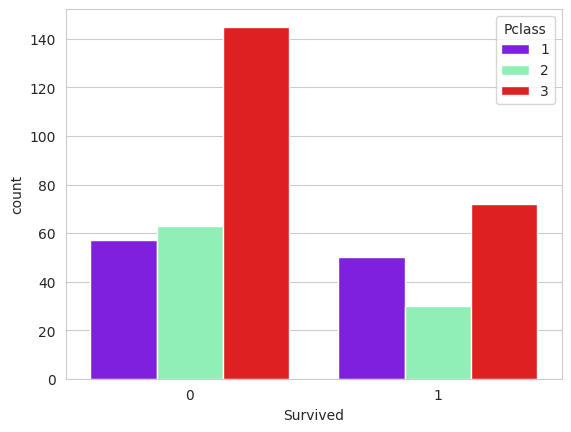

In [35]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df,palette='rainbow')

<Axes: >

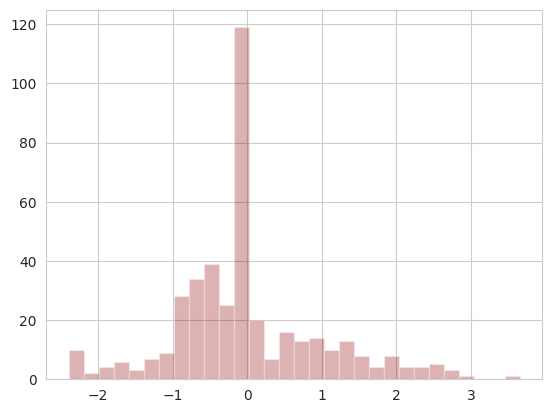

In [36]:
df['Age'].hist(bins=30,color='darkred',alpha=0.3)

<Axes: xlabel='SibSp', ylabel='count'>

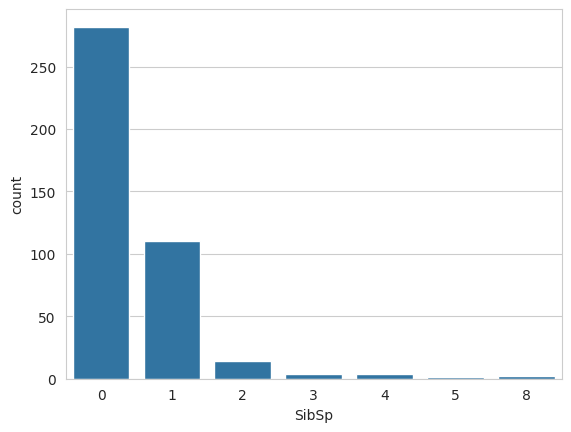

In [37]:
sns.countplot(x='SibSp',data=df)

<Axes: >

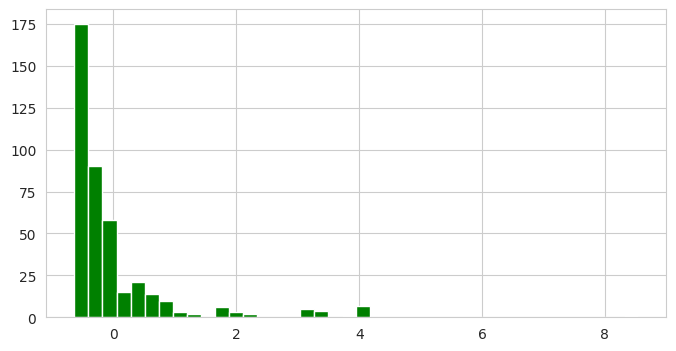

In [38]:
df['Fare'].hist(color='green',bins=40,figsize=(8,4))

<ipython-input-39-83094e579066>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')


<Axes: xlabel='Pclass', ylabel='Age'>

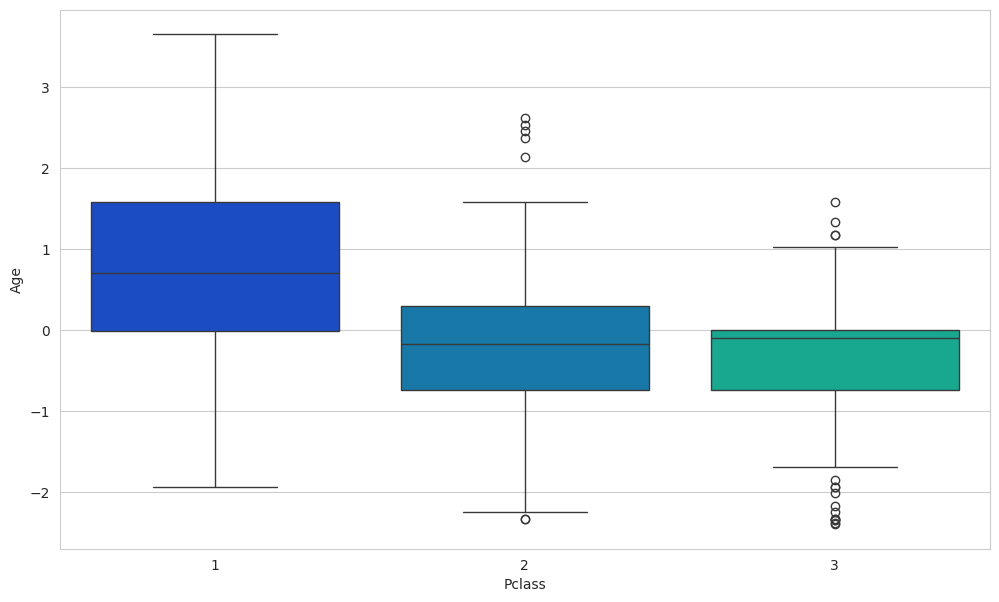

In [39]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

## Building a Logistic Regression model

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [41]:
X = df.drop("Survived", axis=1).values
Y = df["Survived"].values

In [42]:
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.3, random_state=1)

In [43]:
logisticregression = LogisticRegression(solver='lbfgs', max_iter=3000)

In [44]:
logisticregression.fit(X_train,Y_train)

LogisticRegression(max_iter=3000)

In [45]:
y_pred = logisticregression.predict(X_test)

### Evaluation

In [46]:
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

In [47]:
print("Classification report :", classification_report(Y_test,y_pred))

Classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        80
           1       1.00      1.00      1.00        46

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [48]:
print("Confusion Metrix:")
print(confusion_matrix(Y_test,y_pred))

Confusion Metrix:
[[80  0]
 [ 0 46]]


In [49]:
print("Accuracy score :", accuracy_score(Y_test,y_pred))

Accuracy score : 1.0


In [50]:
print("Training data accuracy:", logisticregression.score(X_train,Y_train))
print("Test data accuracy:", logisticregression.score(X_test,Y_test))

Training data accuracy: 1.0
Test data accuracy: 1.0
